In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn import cluster, mixture
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# models
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

# metrics
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


In [57]:
df = pd.read_csv("../../data/after_fe_data.csv")

In [79]:
def visualize_pca_dataset_labels(dataframe, labels, highlight=[], alpha=0.9, s=10, cmap='viridis'):
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(dataframe)

    if highlight:
        alphas = [0 if label not in highlight else alpha for label in labels]
    else:
        alphas = alpha

    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, alpha=alphas, cmap=cmap, s=s)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Visualization with Labels')
    plt.colorbar(label='Labels')
    plt.show()


def visualize_tsne_dataset_labels(dataframe, labels, alpha=0.9, s=10, cmap='viridis'):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_data = tsne.fit_transform(dataframe)
    
    plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, alpha=alpha, cmap=cmap, s=s)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title('t-SNE Visualization with Labels')
    plt.colorbar(label='Labels')
    plt.show()

# Choosing models

## KMEANS

### Choosing number of clusters  

In [59]:
def metrics_plots(df, max_k):

    score = []
    score_kmeans_s = []
    score_kmeans_c = []
    score_kmeans_d = []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state= 101)
        predictions = kmeans.fit_predict(df)
        score.append(-1 * kmeans.score(df))
        score_kmeans_s.append(silhouette_score(df, kmeans.labels_))
        score_kmeans_c.append(calinski_harabasz_score(df, kmeans.labels_))
        score_kmeans_d.append(davies_bouldin_score(df, predictions))

    list_scores = [score, score_kmeans_s, score_kmeans_c, score_kmeans_d] 
    list_title = ['Within-cluster sum of squares', 'Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin'] 
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    for i in range(len(list_scores)):
        x_ticks = list(range(2, len(list_scores[i]) + 2))
        ax[i//2, i%2].plot(x_ticks, list_scores[i])
        ax[i//2, i%2].set_title(list_title[i])
        ax[i//2, i%2].set_xlabel('Number of clusters')
        ax[i//2, i%2].set_ylabel('Score')
    plt.tight_layout()
    plt.show()

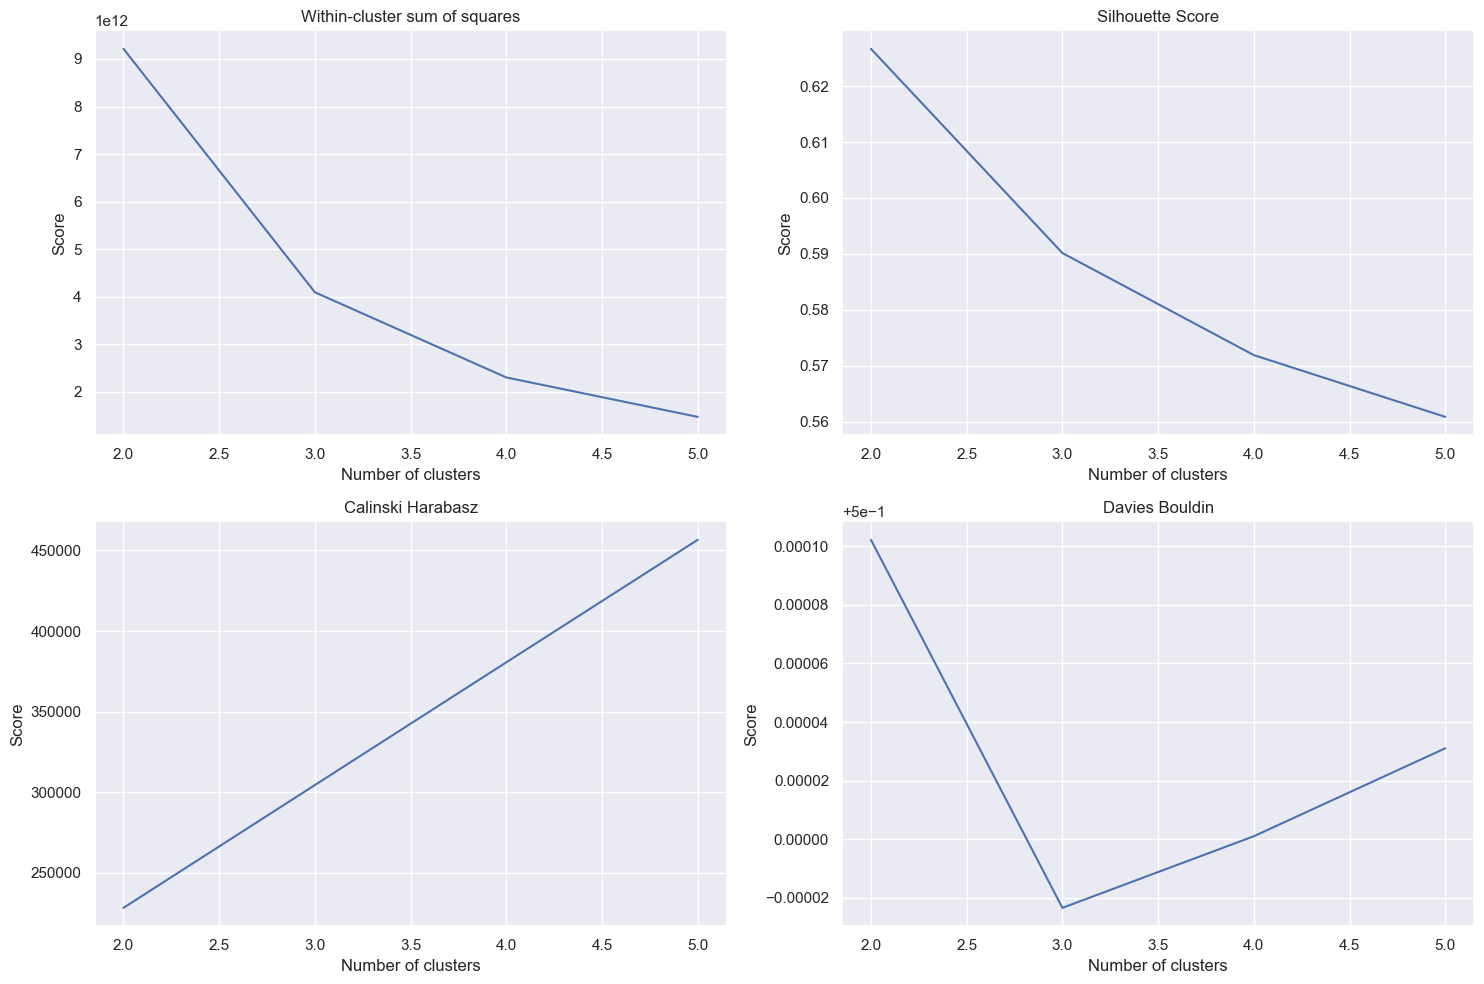

In [6]:
metrics_plots(df, 6)

### Implementing kmeans for 3 and 4 clusters

In [60]:
kmeans_3 = KMeans(3, random_state=0)
kmeans_3.fit(df)

KMeans(n_clusters=3, random_state=0)

In [61]:
kmeans_4 = KMeans(4, random_state=0)
kmeans_4.fit(df)

KMeans(n_clusters=4, random_state=0)

### Visualizations

#### PCA

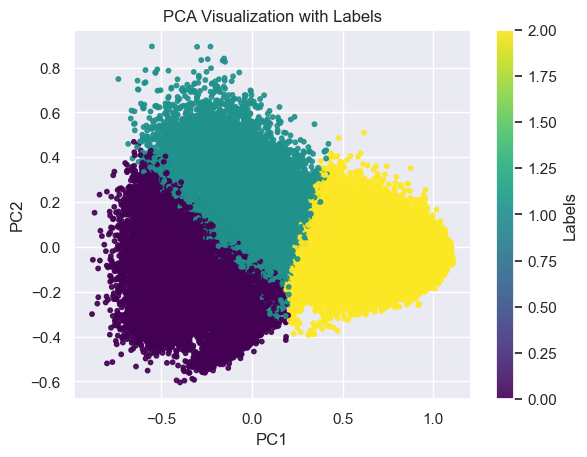

In [64]:
visualize_pca_dataset_labels(df, kmeans_3.labels_)

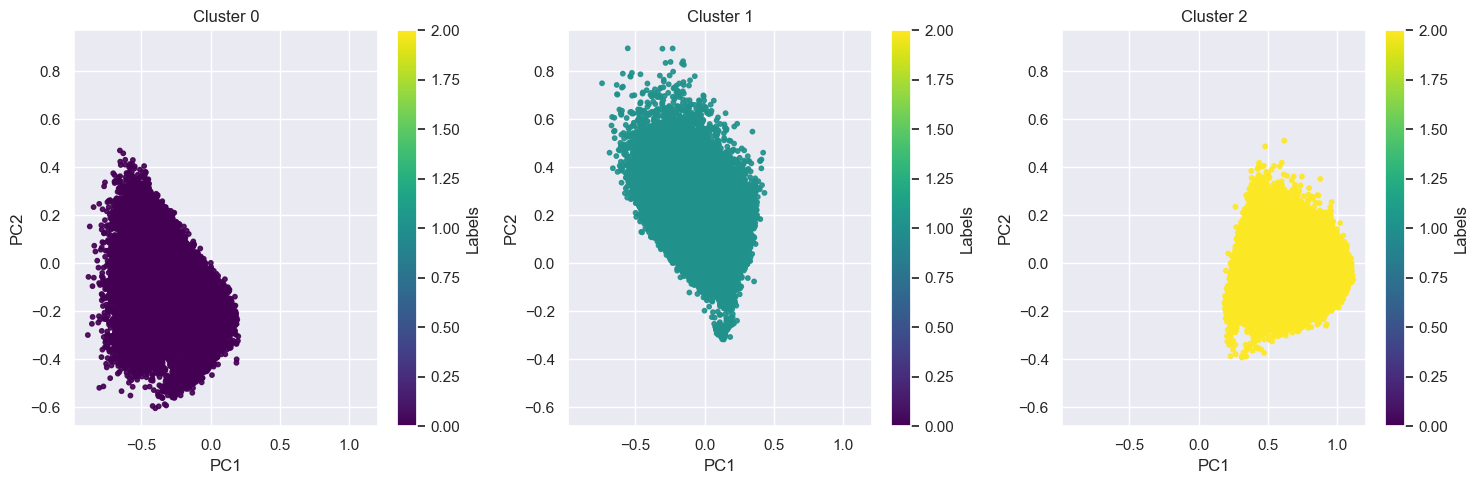

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    visualize_pca_dataset_labels(df, kmeans_3.labels_, highlight=[i], ax=axs[i])
    axs[i].set_title(f'Cluster {i}')
plt.tight_layout()

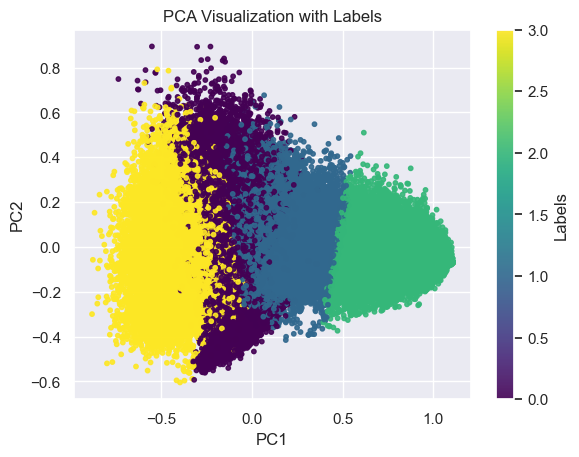

In [42]:
visualize_pca_dataset_labels(df, kmeans_4.labels_)

#### T-SNE

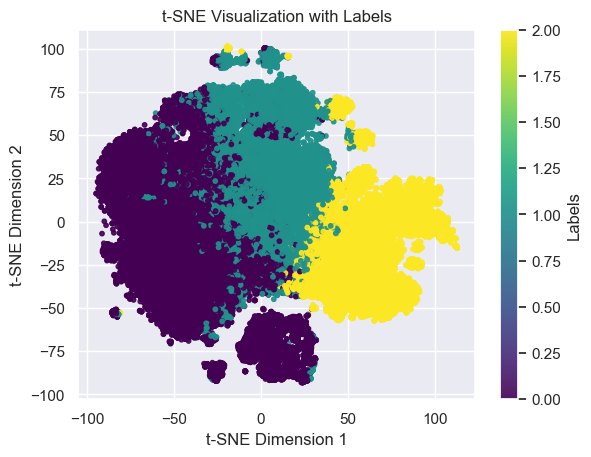

In [44]:
visualize_tsne_dataset_labels(df, kmeans_3.labels_)

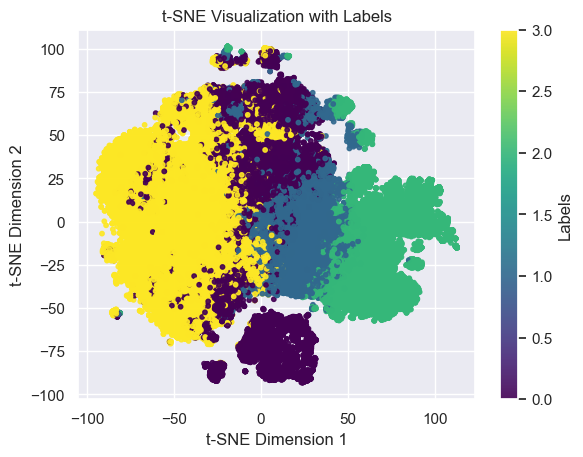

In [45]:
visualize_tsne_dataset_labels(df, kmeans_4.labels_)

## Minibatch

In [8]:
miniBatch_3 = cluster.MiniBatchKMeans(3)
miniBatch_3.fit(df)

MiniBatchKMeans(n_clusters=3)

In [9]:
miniBatch_4 = cluster.MiniBatchKMeans(4)
miniBatch_4.fit(df)

MiniBatchKMeans(n_clusters=4)

### Visualizations

3 clusters:

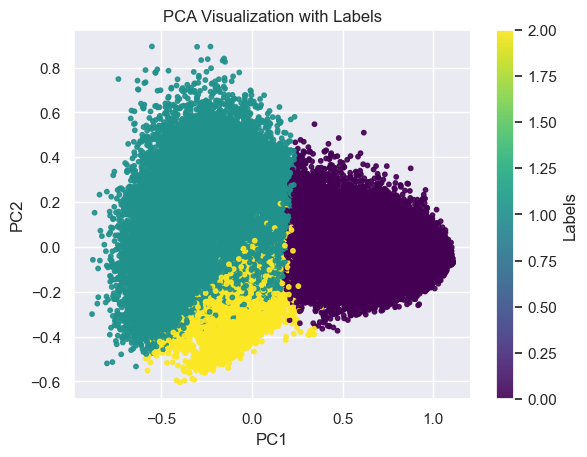

In [53]:
visualize_pca_dataset_labels(df, miniBatch_3.labels_)

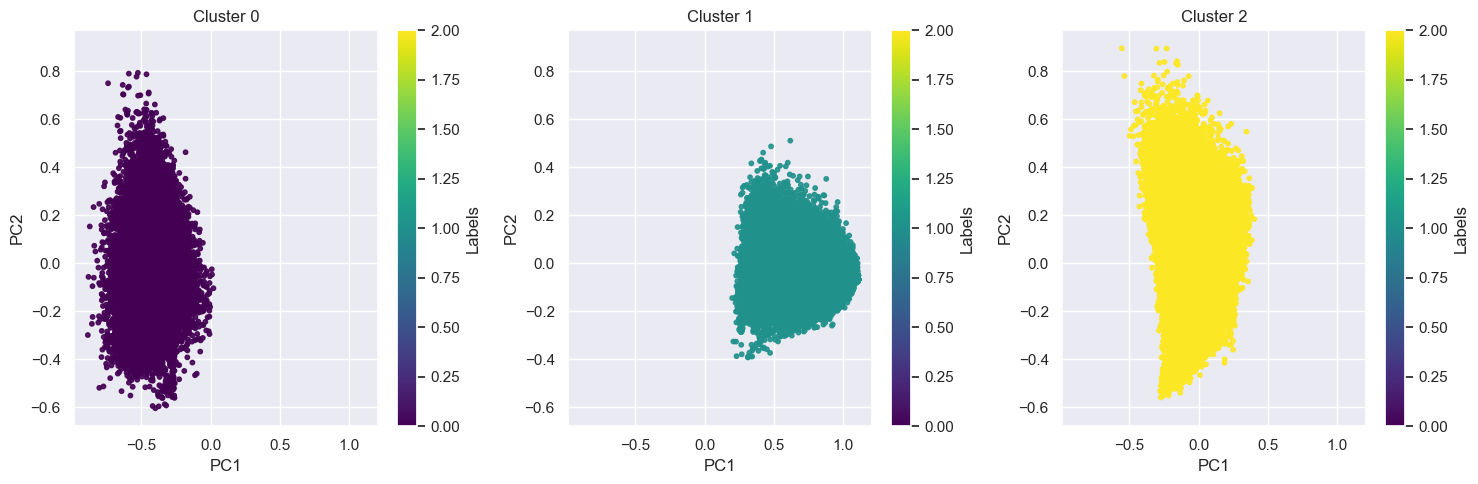

In [77]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    visualize_pca_dataset_labels(df, miniBatch_3.labels_, highlight=[i], ax=axs[i])
    axs[i].set_title(f'Cluster {i}')
plt.tight_layout()

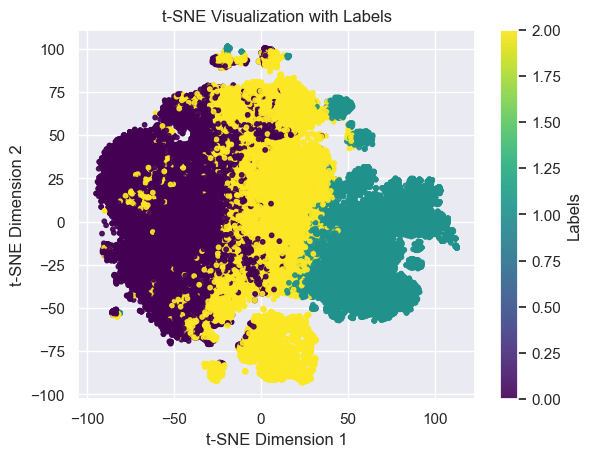

In [10]:
visualize_tsne_dataset_labels(df, miniBatch_3.labels_)

4 clusters:

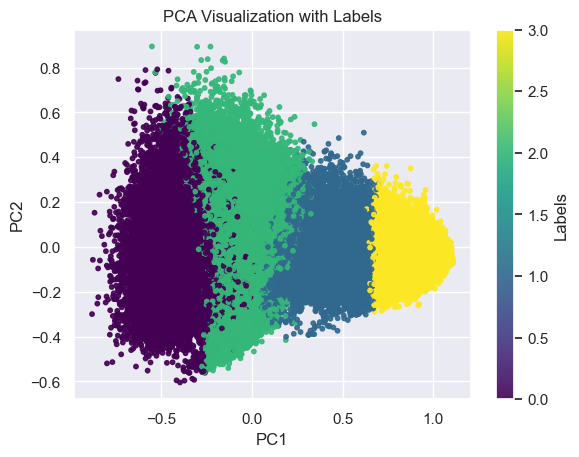

In [55]:
visualize_pca_dataset_labels(df, miniBatch_4.labels_)

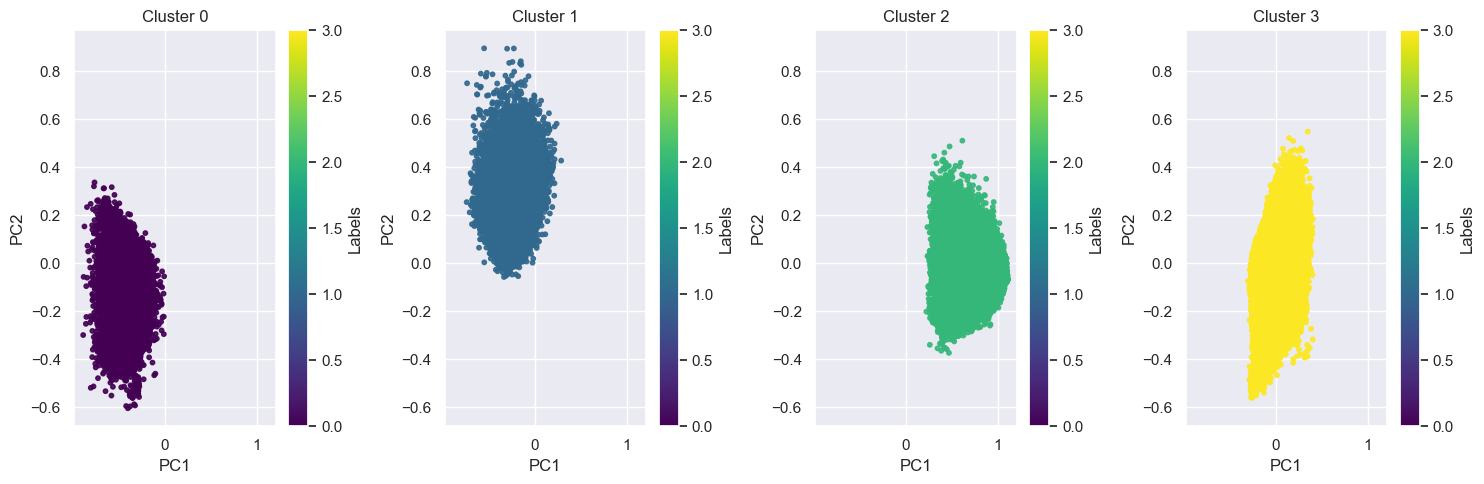

In [73]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
    visualize_pca_dataset_labels(df, miniBatch_4.labels_, highlight=[i], ax=axs[i])
    axs[i].set_title(f'Cluster {i}')
plt.tight_layout()

In [54]:
visualize_tsne_dataset_labels(df, miniBatch_4.labels_)

## DBSCAN (model doesn't work)

### choosing minPts ans eps parameters

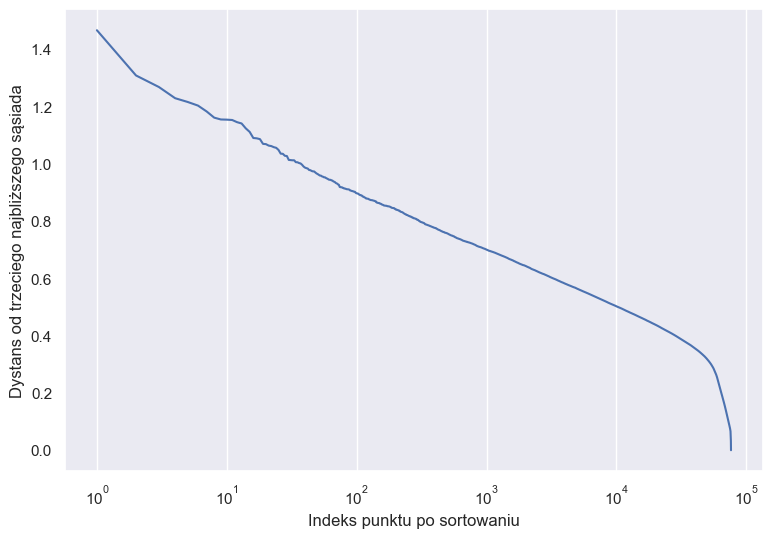

In [56]:
minPts = 70 # doubled number of dimentions

nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(df)
distances, indices = nbrs.kneighbors(df)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks punktu po sortowaniu')
plt.ylabel('Dystans od trzeciego najbliższego sąsiada')
ax1.plot(list(range(1,df.shape[0]+1)), distanceDec)

plt.xscale('log')
plt.grid(axis='y')

plt.show()

In [57]:
eps = 1.1
minPts = 70
# dbs = cluster.DBSCAN(eps=eps, min_samples=minPts)

In [58]:
dbs.fit(df)

In [21]:
set(dbs.labels_)

{0, 1, 2, 3, 4}

### Visualization

In [ ]:
visualize_pca_dataset_labels(df, dbs.labels_)


## GMM

In [11]:
def _GMM(X, n_components, covariance_type='full'):
    gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gmm.fit(X)
    return X, gmm

In [12]:
x, gmm = _GMM(df, 3)

In [13]:
gmm.predict(x)

array([1, 0, 2, ..., 0, 0, 0], dtype=int64)

### Visualizations

3 clusters:

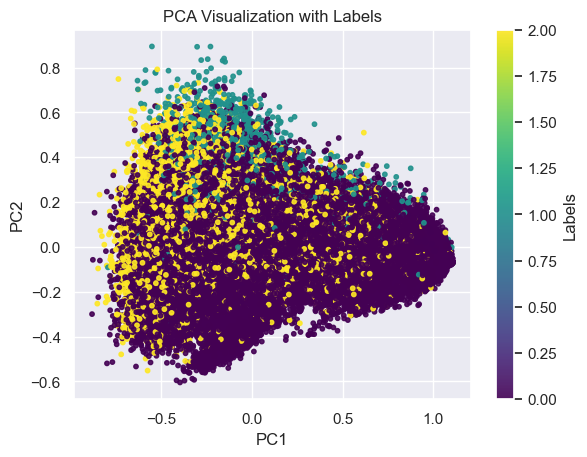

In [14]:
visualize_pca_dataset_labels(df, gmm.predict(x))

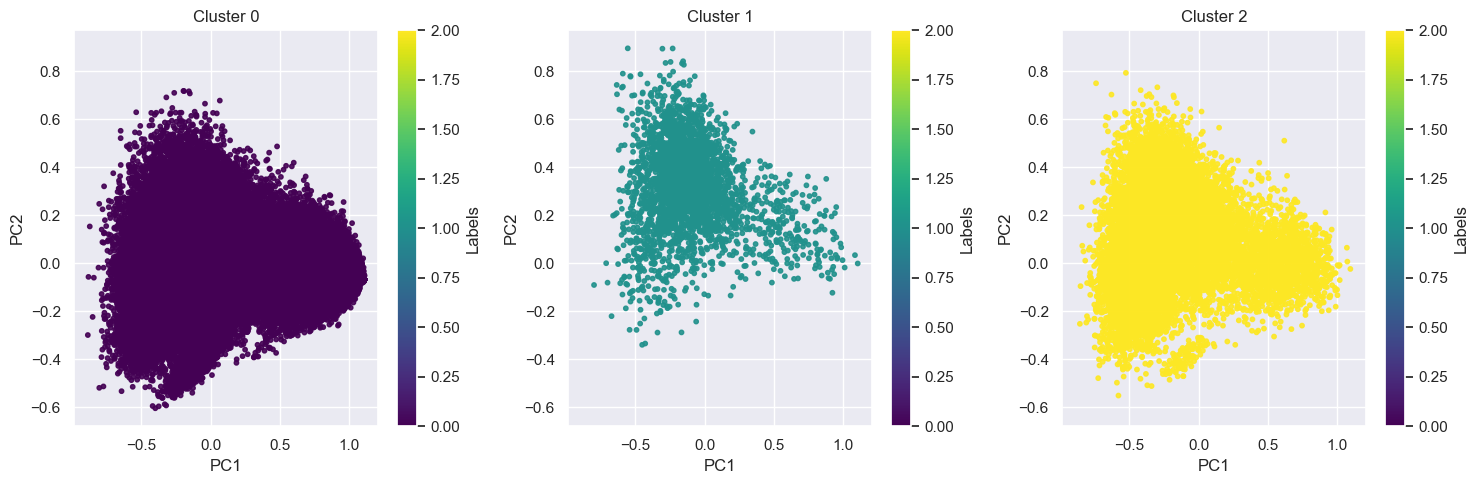

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    visualize_pca_dataset_labels(df, gmm.predict(x), highlight=[i], ax=axs[i])
    axs[i].set_title(f'Cluster {i}')
plt.tight_layout()

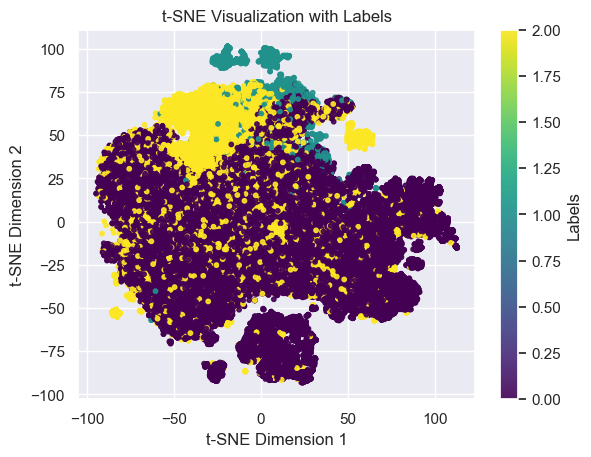

In [18]:
visualize_tsne_dataset_labels(df, gmm.predict(x))

4 clusters:

In [16]:
x, gmm_4 = _GMM(df, 4)

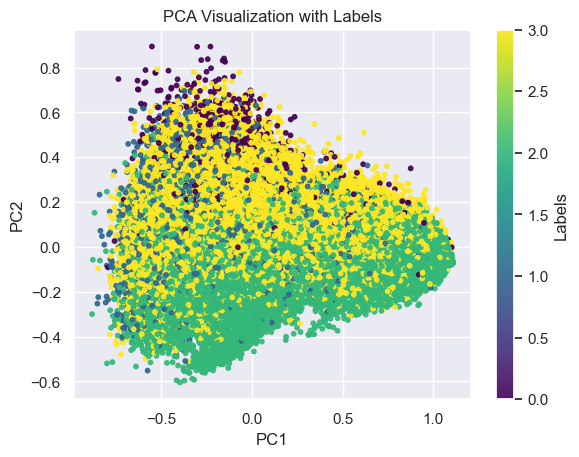

In [17]:
visualize_pca_dataset_labels(df, gmm_4.predict(x))

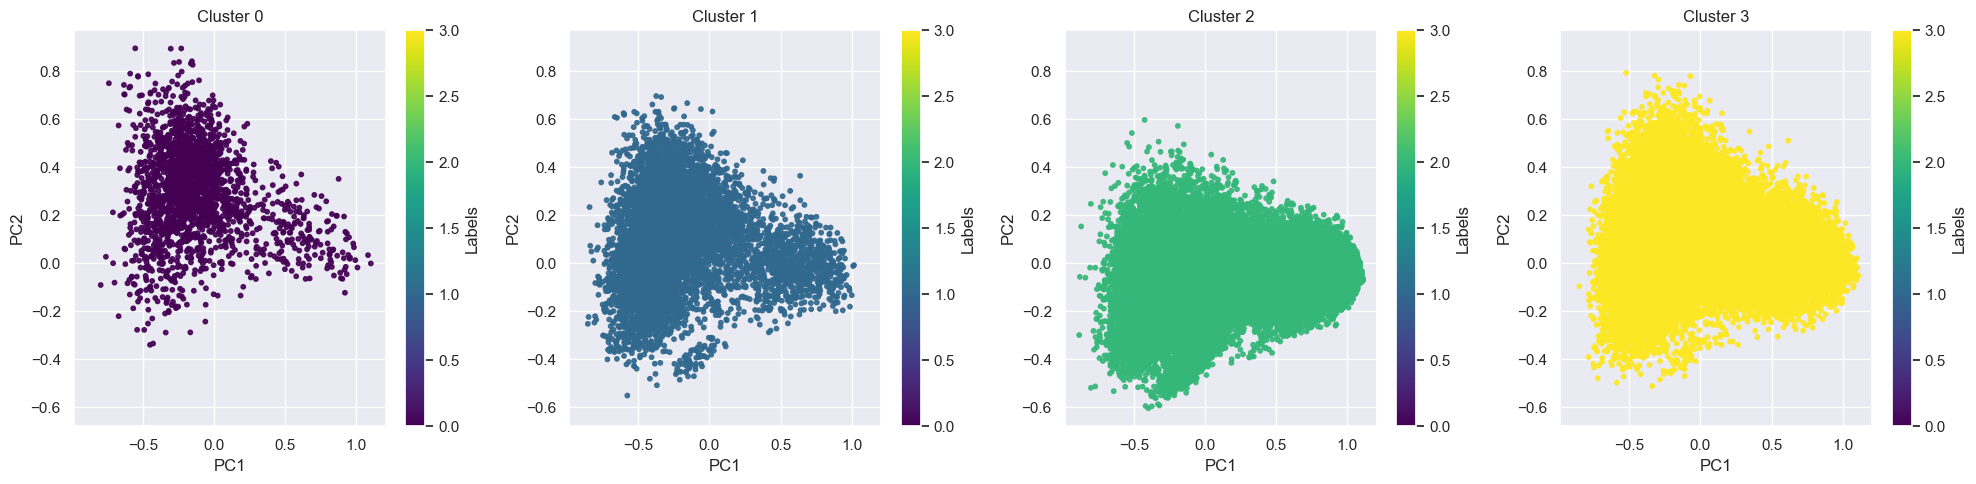

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(20, 5))
for i in range(4):
    visualize_pca_dataset_labels(df, gmm_4.predict(x), highlight=[i], ax=axs[i])
    axs[i].set_title(f'Cluster {i}')
plt.tight_layout()

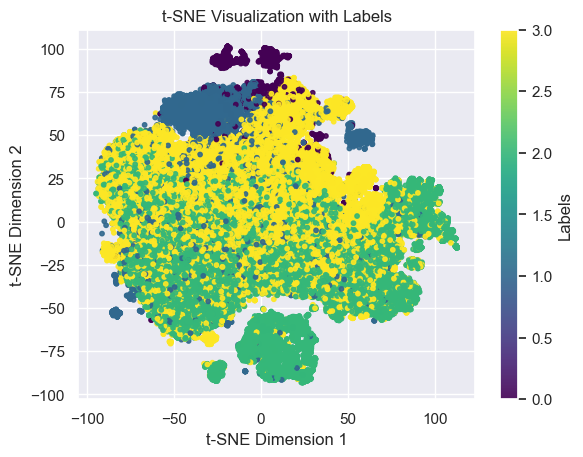

In [19]:
visualize_tsne_dataset_labels(df, gmm_4.predict(x))

Gaussian Mixture Model does not provide sufficient results for both 3 and 4 clusters.

### The best model seems to be MiniBatchKMeans with 3 and 4 clusters

### Now we'll try to optimize this model

In [87]:
param_grid_3 = {'n_clusters': [3],
              'init': ['k-means++', 'random'],
              'max_iter': [20, 50, 100, 200, 300, 400],
              'batch_size': [100, 400, 800, 1000, 2000],
              'tol': [0.0001, 0.001, 0.01, 0.1, 1.0],
              'reassignment_ratio': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]}

kmeans = MiniBatchKMeans()
grid_clf3 = GridSearchCV(kmeans, param_grid_3, cv=5)
grid_clf3.fit(df)


GridSearchCV(cv=5, estimator=MiniBatchKMeans(),
             param_grid={'batch_size': [100, 400, 800, 1000, 2000],
                         'init': ['k-means++', 'random'],
                         'max_iter': [20, 50, 100, 200, 300, 400],
                         'n_clusters': [3],
                         'reassignment_ratio': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1.0]})

In [80]:
param_grid_4 = {'n_clusters': [4],
              'init': ['k-means++', 'random'],
              'max_iter': [20, 50, 100, 200, 300, 400],
              'batch_size': [100, 400, 800, 1000, 2000],
              'tol': [0.0001, 0.001, 0.01, 0.1, 1.0],
              'reassignment_ratio': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]}

kmeans = MiniBatchKMeans()

grid_clf_4 = GridSearchCV(kmeans, param_grid_4, cv=5)

grid_clf_4.fit(df)

print(grid_clf_4.best_params_)


{'batch_size': 2000, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 4, 'reassignment_ratio': 0.3, 'tol': 0.0001}


In [141]:
best_params_3 = {'batch_size': 2000, 'init': 'k-means++', 'max_iter': 400, 'n_clusters': 3, 'reassignment_ratio': 0.01, 'tol': 0.0001}

best_params_4 = {'batch_size': 2000, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 4, 'reassignment_ratio': 0.3, 'tol': 0.0001}

In [142]:
best_miniBatch_3 = MiniBatchKMeans(**best_params_3)

best_miniBatch_3.fit(df)

MiniBatchKMeans(batch_size=2000, max_iter=400, n_clusters=3, tol=0.0001)

In [143]:
best_miniBatch_4 = MiniBatchKMeans(**best_params_4)

best_miniBatch_4.fit(df)

MiniBatchKMeans(batch_size=2000, max_iter=300, n_clusters=4,
                reassignment_ratio=0.3, tol=0.0001)

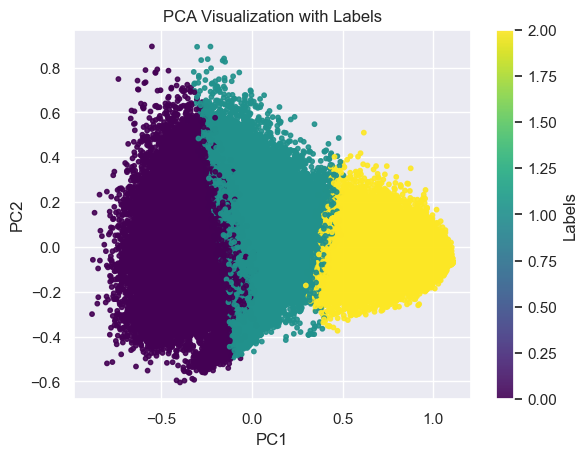

In [89]:
visualize_pca_dataset_labels(df, best_miniBatch_3.labels_)

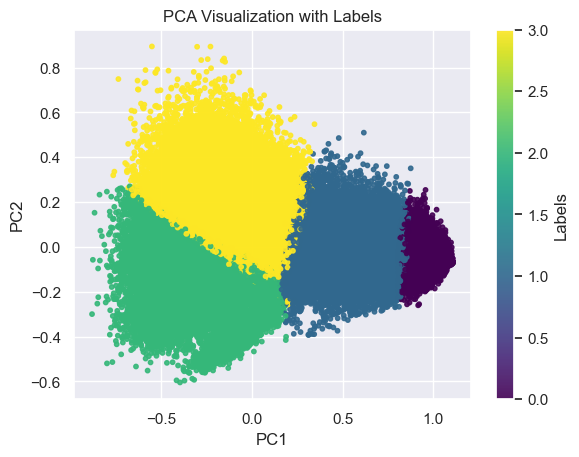

In [83]:
visualize_pca_dataset_labels(df, best_miniBatch_4.labels_)

In [90]:
# Jebniemy jeszcze jakiegoś printa że wybieramy jakieś kluby np Barcelona, Real, Bayern, PSG i patrzymy czy zawodnicy są dobrze poklastrowani

In [144]:
clusters_3 = best_miniBatch_3.predict(df)
clusters_4 = best_miniBatch_4.predict(df)
df['cluster_3'] = clusters_3
df['cluster_4'] = clusters_4

In [145]:
df_all = pd.read_csv("../../data/players_home_matches.csv")

df_team = pd.concat([df, df_all[['championship_name', 'homeTeamName', 'playerName']]], axis=1)

In [153]:
df_team[(df_team['homeTeamName'] == 'Barcelona') & (df_team['playerName'] == 'Lionel Messi')].head(20)

,goals,assists,shots_total,shots_on_target,xg,xa,gca,carries,dispossessed,dribbled_past,...,dribbles,fouled,fouls,offsides,minutes,cluster_3,cluster_4,championship_name,homeTeamName,playerName
23664,0.00,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.274890,0.000000,0.000000,...,0.052632,0.090909,0.000000,0.000000,0.266667,1.0,3.0,liga,Barcelona,Lionel Messi
23684,0.00,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.187404,0.000000,0.000000,...,0.052632,0.000000,0.000000,0.000000,0.066667,1.0,0.0,liga,Barcelona,Lionel Messi
23695,0.00,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.449810,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.0,1.0,liga,Barcelona,Lionel Messi
23703,0.00,0.00,0.076923,0.000,0.037037,0.000000,0.000000,0.201802,0.000000,0.000000,...,0.000000,0.090909,0.222222,0.000000,0.233333,1.0,3.0,liga,Barcelona,Lionel Messi
23720,0.00,0.00,0.076923,0.000,0.037037,0.136364,0.000000,0.584506,0.076923,0.000000,...,0.105263,0.000000,0.111111,0.000000,1.000000,2.0,1.0,liga,Barcelona,Lionel Messi
23771,0.00,0.00,0.000000,0.000,0.000000,0.000000,0.000000,0.469628,0.000000,0.083333,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.0,1.0,liga,Barcelona,Lionel Messi
23781,0.50,0.00,0.230769,0.375,0.074074,0.227273,0.000000,0.201802,0.000000,0.083333,...,0.052632,0.090909,0.000000,0.000000,0.344444,1.0,3.0,liga,Barcelona,Lionel Messi
23798,0.00,0.00,0.076923,0.000,0.111111,0.136364,0.000000,0.661653,0.076923,0.166667,...,0.157895,0.090909,0.000000,0.166667,1.000000,2.0,1.0,liga,Barcelona,Lionel Messi
23800,0.00,0.00,0.307692,0.125,0.407407,0.000000,0.000000,0.407297,0.000000,0.083333,...,0.052632,0.090909,0.000000,0.166667,0.722222,0.0,2.0,liga,Barcelona,Lionel Messi
23808,0.25,0.00,0.076923,0.125,0.074074,0.000000,0.166667,0.670634,0.153846,0.166667,...,0.000000,0.181818,0.222222,0.000000,1.000000,2.0,1.0,liga,Barcelona,Lionel Messi
